In [1]:
import numpy as np
from dnn_helpers_fn import *


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
X, Y = mnist['data'], mnist['target']


In [4]:
def one_hot_array(Y):
    b = np.zeros((int(Y.size), int(Y.max()) + 1))
    b[np.arange(Y.size), Y.astype(int)] = 1
    return b.T

In [5]:
X = X.to_numpy().T.astype(float)
Y = Y.to_numpy().T.astype(float)
Y_onehot = one_hot_array(Y)
print("Shape of X is: ", str(X.shape))
print("Shape of Y is: ", str(Y_onehot.shape))

Shape of X is:  (784, 70000)
Shape of Y is:  (10, 70000)


In [6]:
split_size = 50000

In [7]:
X_train = X[:, 0:split_size]
X_test = X[:, split_size:60000]
X_dev = X[:, 60000:70000]
Y_train = Y_onehot[:, 0:split_size]
Y_test = Y_onehot[:, split_size:60000]
Y_dev = Y_onehot[:, 60000:70000]
print("Shape of X_train is: " + str(X_train.shape))
print("Shape of X_test is: " + str(X_test.shape))
print("Shape of X_dev is: " + str(X_dev.shape))
print("Shape of Y_train is: " + str(Y_train.shape))
print("Shape of Y_test is: " + str(Y_test.shape))
print("Shape of Y_dev is: " + str(Y_dev.shape))

Shape of X_train is: (784, 50000)
Shape of X_test is: (784, 10000)
Shape of X_dev is: (784, 10000)
Shape of Y_train is: (10, 50000)
Shape of Y_test is: (10, 10000)
Shape of Y_dev is: (10, 10000)


In [8]:
import matplotlib.pyplot as plt

y = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


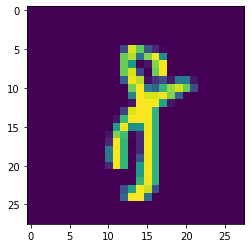

In [9]:
index = 240
plt.imshow((X_train.T[index]*255).reshape(28,28))
print ("y = " + str(Y_train.T[index]))

In [ ]:
parameters, activation = l_dnn(X_train, Y_train, X_test, Y_test, learning_rate=0.001, num_iterations=400, 
                   model_shape=(784, 700, 200, 10), activation=['relu', 'relu', 'softmax'],  print_cost=True)

In [37]:
pred_test, probs_test = predict(X_test, parameters, activation)
print("Test set error is: " + str(evaluate_prediction(pred_test, Y_test)))

Train set error is: 0.9674000000000001
Test set error is: 0.9150000000000003
